In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.interpolate import griddata
import pandas as pd

BCIsensor_xy = np.genfromtxt('BCIsensor_xy.csv',delimiter=',')
feaSubEImg_1 = np.genfromtxt('feaSubEImg_1.csv',delimiter=',')
feaSubEImg_2 = np.genfromtxt('feaSubEImg_2.csv',delimiter=',')
feaSubEOvert_1 = np.genfromtxt('feaSubEOvert_1.csv',delimiter=',')
feaSubEOvert_2 = np.genfromtxt('feaSubEOvert_2.csv',delimiter=',')

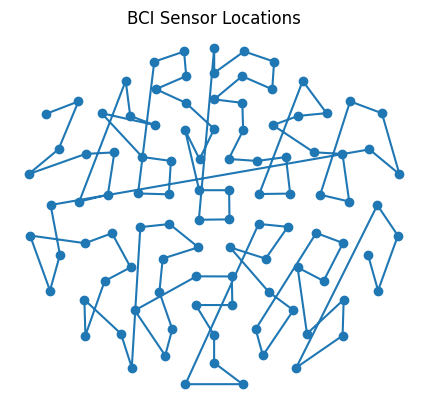

In [62]:
plt.plot(BCIsensor_xy[:,0],BCIsensor_xy[:,1])
plt.scatter(BCIsensor_xy[:,0],BCIsensor_xy[:,1])
plt.title("BCI Sensor Locations")
ax = plt.gca()
ax.set_aspect('equal')
plt.axis('off')
plt.show()

In [ ]:
def plotBrains(data_x, data_y, title, fname, dfunc):
    xi = np.linspace(min(BCIsensor_xy[:,0]),max(BCIsensor_xy[:,0]))
    yi = np.linspace(min(BCIsensor_xy[:,1]),max(BCIsensor_xy[:,1]))
    gridx,gridy = np.meshgrid(xi,yi)
    fig, ax = plt.subplots(11,11,figsize=(15,15))
    for i in range(120):
        ii = i // 11
        jj = i % 11
        d = dfunc(data_x,data_y)[i]
        grid = griddata((BCIsensor_xy[:,0], BCIsensor_xy[:,1]), d, (gridx,gridy), method='linear')
        c = ax[ii][jj].pcolor(grid)
        ax[ii][jj].axis('off')
    ax[10][10].axis('off')
    cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.ax.yaxis.set_ticks_position('right')
    fig.suptitle(title)
    plt.savefig(fname)
# transpose so they are (120, 102) each row is an observation
img_class_1_x = feaSubEImg_1[np.arange(0,feaSubEImg_1.shape[0],2)].T
img_class_1_y = feaSubEImg_1[np.arange(1,feaSubEImg_1.shape[0],2)].T
img_class_2_x = feaSubEImg_2[np.arange(0,feaSubEImg_2.shape[0],2)].T
img_class_2_y = feaSubEImg_2[np.arange(1,feaSubEImg_2.shape[0],2)].T

overt_class_1_x = feaSubEOvert_1[np.arange(0,feaSubEOvert_1.shape[0],2)].T
overt_class_1_y = feaSubEOvert_1[np.arange(1,feaSubEOvert_1.shape[0],2)].T
overt_class_2_x = feaSubEOvert_2[np.arange(0,feaSubEOvert_2.shape[0],2)].T
overt_class_2_y = feaSubEOvert_2[np.arange(1,feaSubEOvert_2.shape[0],2)].T

def addXY(d1,d2):
    return d1+d2

plotBrains(img_class_1_x,img_class_1_y,"img_class_1","./img_class_1.png",addXY)
plotBrains(img_class_2_x,img_class_2_y,"img_class_2","./img_class_2.png",addXY)
plotBrains(overt_class_1_x,overt_class_1_x,"overt_class_1","./overt_class_1.png",addXY)
plotBrains(overt_class_1_y,overt_class_1_y,"overt_class_2","./overt_class_2.png",addXY)

In [139]:
img_combined = np.ndarray((feaSubEImg_1.shape[1]+feaSubEImg_2.shape[1],feaSubEImg_1.shape[0]+1))
img_combined[:feaSubEImg_1.shape[1],:feaSubEImg_1.shape[0]] = feaSubEImg_1.T
img_combined[:feaSubEImg_1.shape[1],feaSubEImg_1.shape[0]] = 1
img_combined[feaSubEImg_1.shape[1]:,:feaSubEImg_2.shape[0]] = feaSubEImg_2.T
img_combined[feaSubEImg_1.shape[1]:,feaSubEImg_2.shape[0]] = 0

overt_combined = np.ndarray((feaSubEOvert_1.shape[1]+feaSubEOvert_2.shape[1],feaSubEOvert_1.shape[0]+1))
overt_combined[:feaSubEOvert_1.shape[1],:feaSubEOvert_1.shape[0]] = feaSubEOvert_1.T
overt_combined[:feaSubEOvert_1.shape[1],feaSubEOvert_1.shape[0]] = 1
overt_combined[feaSubEOvert_2.shape[1]:,:feaSubEOvert_1.shape[0]] = feaSubEOvert_2.T
overt_combined[feaSubEOvert_2.shape[1]:,feaSubEOvert_2.shape[0]] = 0
print(img_combined.shape)
print(feaSubEImg_1.T.shape)


(240, 205)
(120, 204)


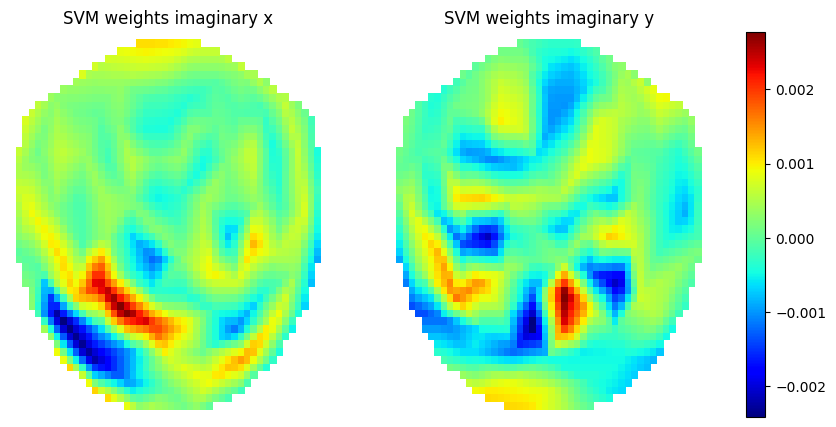

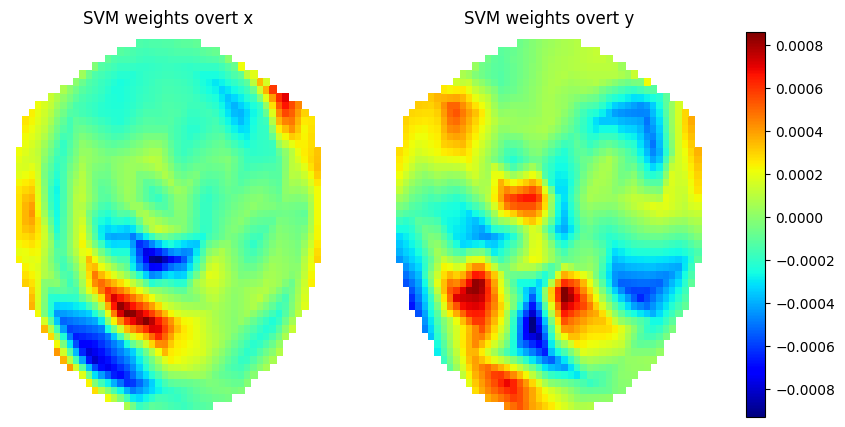

In [72]:
# test NOT FOR FINAL DOC
def func1(d1,d2):
    return d1

def func2(d1,d2):
    return d2

def plotDecisionBoundary(ax, data_x, data_y, title, fname, dfunc):
    xi = np.linspace(min(BCIsensor_xy[:,0]),max(BCIsensor_xy[:,0]))
    yi = np.linspace(min(BCIsensor_xy[:,1]),max(BCIsensor_xy[:,1]))
    gridx,gridy = np.meshgrid(xi,yi)
    d = dfunc(data_x,data_y)
    grid = griddata((BCIsensor_xy[:,0], BCIsensor_xy[:,1]), d, (gridx,gridy), method='linear')
    c = ax.pcolor(grid, cmap='jet')
    ax.axis('off')
    ax.set_title(title)
    return c

def svmWeights(data, title, reg=0.001):
    svm = SVC(kernel='linear', C=reg).fit(data[:,:-1],data[:,-1])

    svm_coef_x = svm.coef_[0,np.arange(0,svm.coef_.shape[1],2)]
    svm_coef_y = svm.coef_[0,np.arange(1,svm.coef_.shape[1],2)]
    fig, ax = plt.subplots(1,2,figsize=(10,5))

    plotDecisionBoundary(ax[0], svm_coef_x,svm_coef_y, f"{title} x","",func1)
    c=plotDecisionBoundary(ax[1], svm_coef_x,svm_coef_y,f"{title} y","",func2)
    cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.ax.yaxis.set_ticks_position('right')
    plt.show()

svmWeights(img_combined, "SVM weights imaginary")
svmWeights(overt_combined, "SVM weights overt")

        

In [131]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

testSize = 40
runs = 6
regs = np.logspace(-6, 4, 11)

def two_level_cv(data_c1, data_c0):

    results = {}
    for runidx in range(runs):
        results[f"run{runidx}"] = {}

        train_c1, test_c1, train_c0, test_c0 = train_test_split(data_c1, data_c0, test_size=1/6)
        train_c1, f1_c1, train_c0, f1_c0 = train_test_split(train_c1, train_c0, test_size=1/5)
        train_c1, f2_c1, train_c0, f2_c0 = train_test_split(train_c1, train_c0, test_size=1/4)
        train_c1, f3_c1, train_c0, f3_c0 = train_test_split(train_c1, train_c0, test_size=1/3)
        f5_c1, f4_c1, f5_c0, f4_c0 = train_test_split(train_c1, train_c0, test_size=1/2)

        test_set = np.vstack((test_c1, test_c0))
        folds = [np.vstack((f1_c1,f1_c0)),np.vstack((f2_c1,f2_c0)),np.vstack((f3_c1,f3_c0)),np.vstack((f4_c1,f4_c0)),np.vstack((f5_c1,f5_c0))]
        for i in range(5):
            cv_test = folds[i]
            cv_train = np.vstack(folds[:i]+folds[i+1:])
            cv_results = []
            for j in regs:
                svm = SVC(kernel='linear', C=j).fit(cv_train[:,:-1],cv_train[:,-1])
                score = svm.score(cv_test[:,:-1], cv_test[:,-1])
                cv_results.append((score,j,svm))
            best = max(cv_results, key=lambda x: x[0])
            results[f"run{runidx}"] = {"score": best[0], "reg": best[1], "model": best[2]}
        
        model = results[f"run{runidx}"]['model']
        results[f"run{runidx}"]['test_result'] = model.score(test_set[:,:-1], test_set[:,-1])
        results[f"run{runidx}"]['decision_stats'] = model.decision_function(test_set[:,:-1])
        results[f"run{runidx}"]['decision_labels'] =  test_set[:,-1]
    return results


In [83]:
img_c1 = np.hstack((feaSubEImg_1.T, np.ones((feaSubEImg_1.T.shape[0],1))))
img_c0 = np.hstack((feaSubEImg_2.T, np.zeros((feaSubEImg_2.T.shape[0],1))))
overt_c1 = np.hstack((feaSubEOvert_1.T, np.ones((feaSubEOvert_1.T.shape[0],1))))
overt_c0 = np.hstack((feaSubEOvert_2.T, np.zeros((feaSubEOvert_2.T.shape[0],1))))

In [132]:
img_img = two_level_cv(img_c1,img_c0)
pd.DataFrame.from_dict(img_img)

,run0,run1,run2,run3,run4,run5
score,0.975,0.975,0.85,0.975,0.85,0.85
reg,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
model,"SVC(C=1e-06, kernel='linear')","SVC(C=1e-06, kernel='linear')","SVC(C=1e-06, kernel='linear')","SVC(C=1e-06, kernel='linear')","SVC(C=1e-06, kernel='linear')","SVC(C=1e-06, kernel='linear')"
test_result,0.875,0.8,0.875,0.875,0.875,0.9
decision_stats,"[2.1460454143722316, 4.826127079377422, 2.5814...","[0.49525645398361595, 0.7105358089760763, 1.91...","[-0.10059850207055265, 10.74850436456861, 2.43...","[0.6296117244531803, 0.38903938730639176, 3.55...","[3.8936845988421513, 2.332533530250844, 3.6388...","[1.813705521237779, 0.5969612728696989, 1.3003..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [133]:
overt_overt = two_level_cv(overt_c1,overt_c0)
pd.DataFrame.from_dict(overt_overt)

,run0,run1,run2,run3,run4,run5
score,1.0,0.85,1.0,0.95,0.95,0.95
reg,0.00001,0.000001,0.00001,0.000001,0.000001,0.000001
model,"SVC(C=1e-05, kernel='linear')","SVC(C=1e-06, kernel='linear')","SVC(C=1e-05, kernel='linear')","SVC(C=1e-06, kernel='linear')","SVC(C=1e-06, kernel='linear')","SVC(C=1e-06, kernel='linear')"
test_result,0.925,0.95,0.975,0.95,0.925,0.975
decision_stats,"[4.4112656380994535, 2.9308926026532363, 4.740...","[2.1247232247262495, 3.5235049857479144, 3.987...","[0.4960797394447125, 3.5746755752018116, 1.489...","[1.0328553407283798, 1.7887493650937434, 0.113...","[2.1461055307690398, 2.9429992432203838, 2.142...","[1.4352095644907523, 2.103245900454576, 1.8953..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [77]:
def calcPdPfa(data):
    h1s = data[data[:,1] == 1].shape[0]
    h0s = data[data[:,1] == 0].shape[0]
    currh1 = h1s
    currh0 = h0s

    pd = [1]
    pfa = [1]
    if h0s == 0:
        pfa.append(0)
        pd.append(1)
    if h1s == 0:
        pfa.append(1)
        pd.append(0) 
    for i in data:
        if i[1] == 1:
            currh1 -= 1
        elif i[1] == 0:
            currh0 -= 1
        pfa.append(0 if h0s == 0 else currh0/h0s)
        pd.append(0 if h1s == 0 else currh1/h1s)
    pd.append(0)
    pfa.append(0)
    return pd,pfa  

def plotROC(data, weights, title):
    
    tpr, fpr = calcPdPfa(data)
    auc = metrics.auc(fpr, tpr)
    
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[1].stem(weights)
    ax[1].set_title(f'{title} SVM weights')

    ax[0].plot(fpr,tpr)
    ax[0].set_title(f'{title} ROC detecting c1 auc:{round(auc,5)}')
    ax[0].plot([0, 1], [0, 1],'r--')
    plt.show()

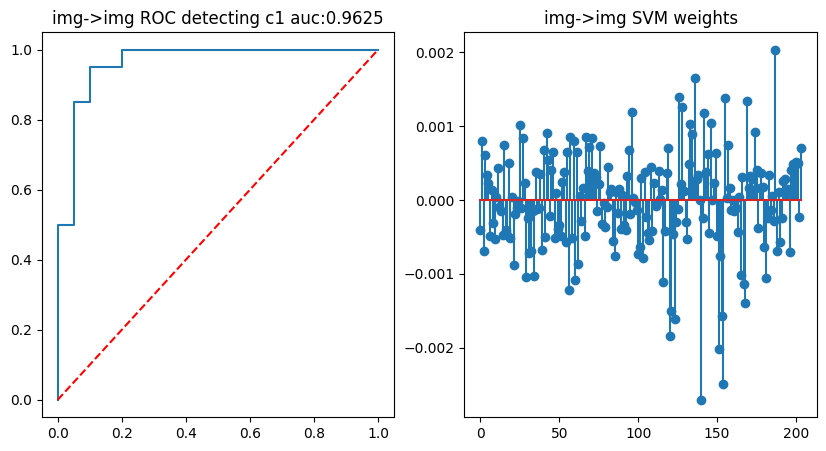

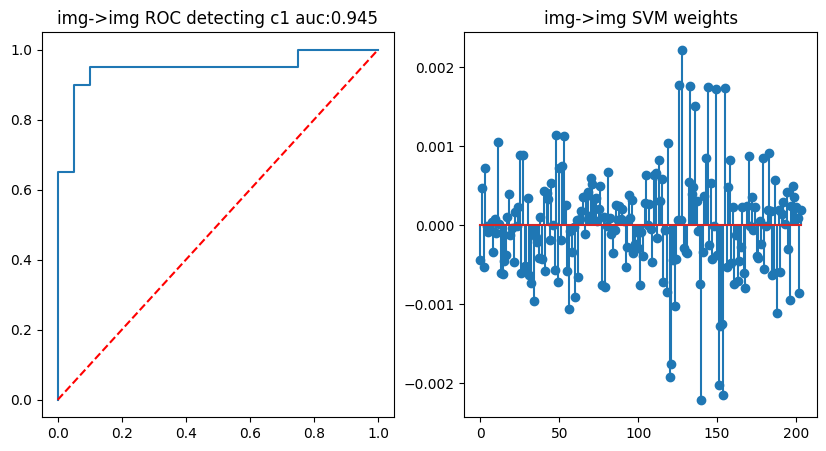

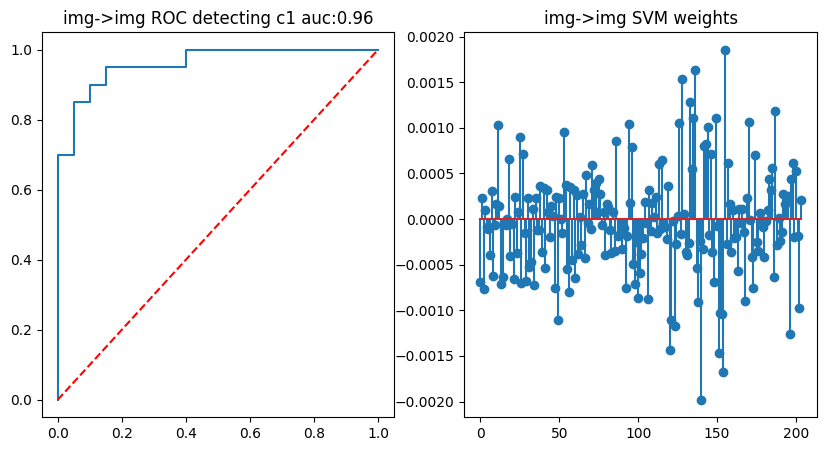

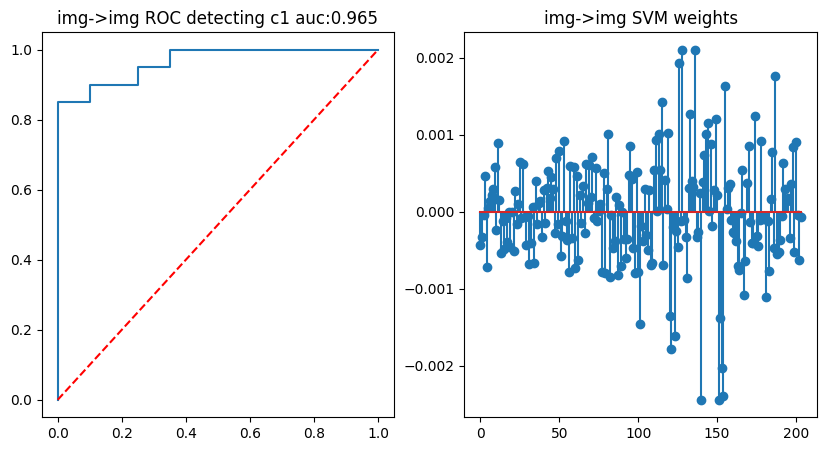

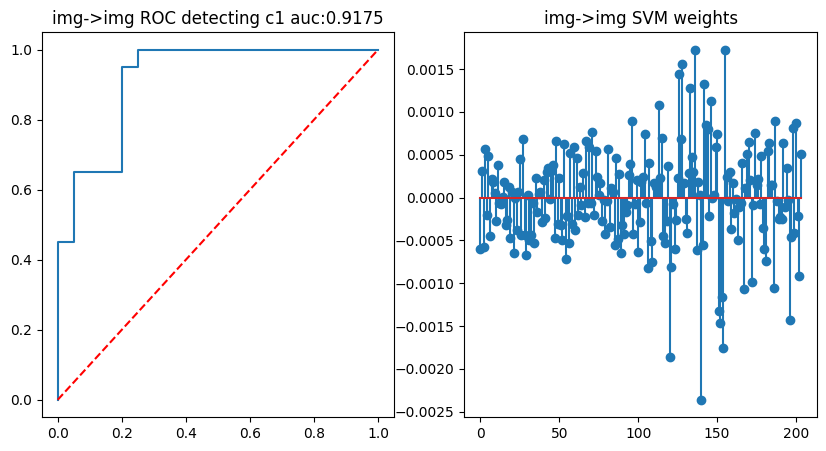

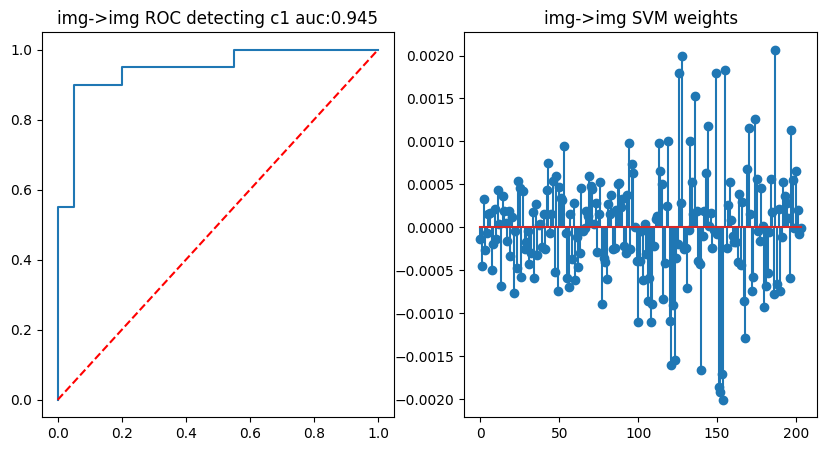

In [78]:
for run in img_img.values():
    decision_stats = run['decision_stats']
    labels = run['decision_labels']
    weights = run['model'].coef_.T
    data = np.column_stack((decision_stats,labels))
    data = data[decision_stats.argsort()]
    plotROC(data, weights, "img->img")

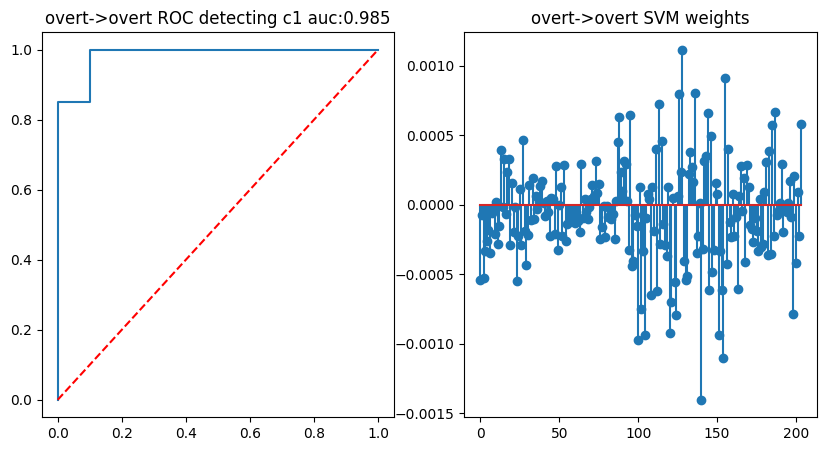

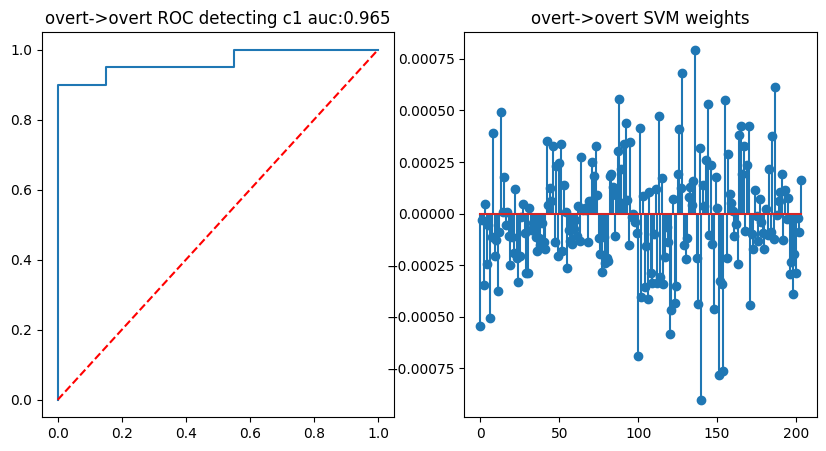

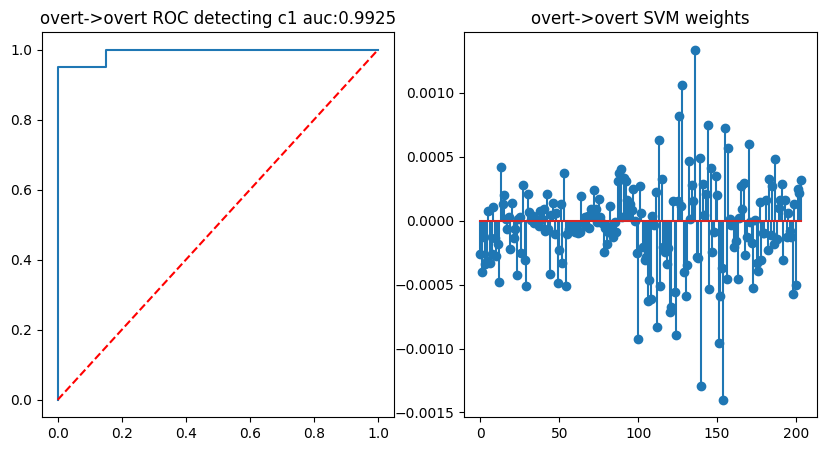

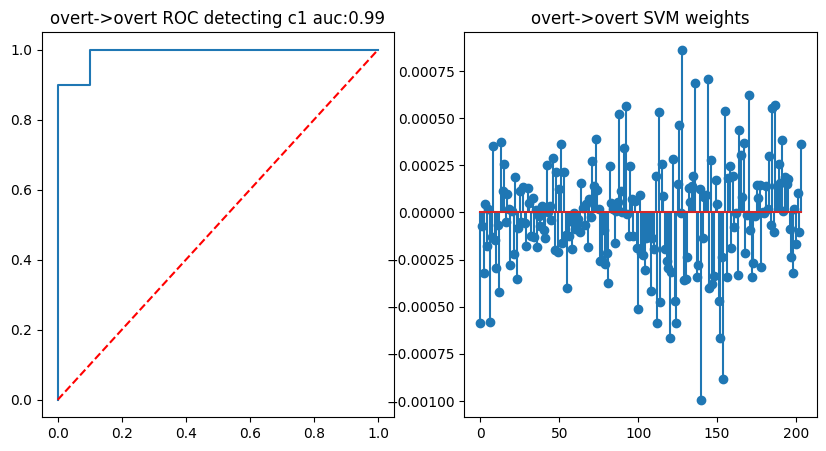

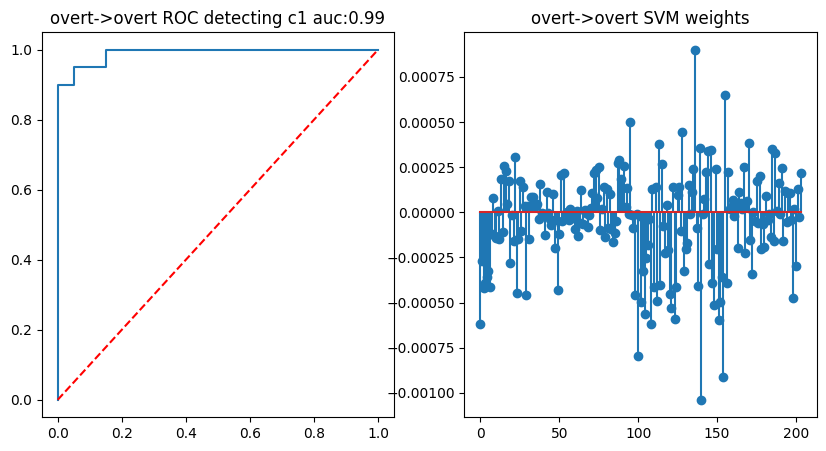

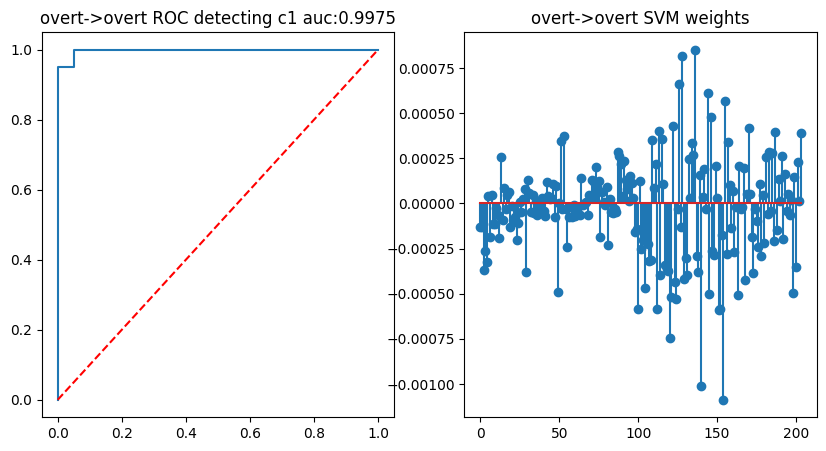

In [136]:
for run in overt_overt.values():
    decision_stats = run['decision_stats']
    labels = run['decision_labels']
    weights = run['model'].coef_.T
    data = np.column_stack((decision_stats,labels))
    data = data[decision_stats.argsort()]

    plotROC(data, weights, "overt->overt")

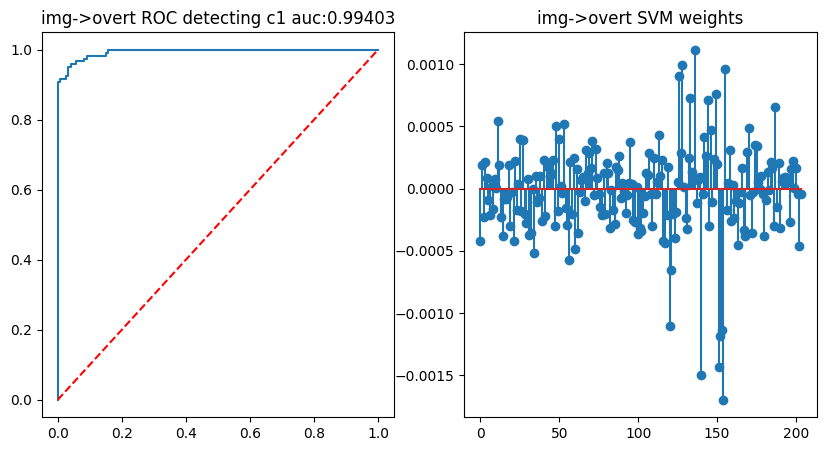

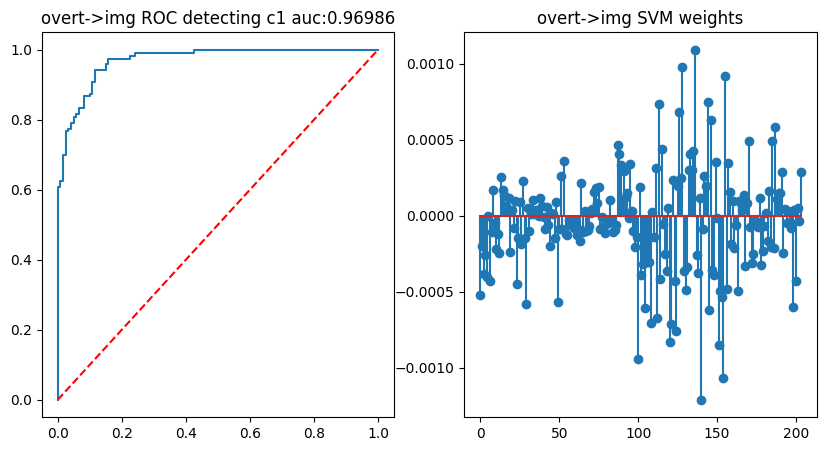

In [141]:
# best reg param is 1e-6

def img_overt_pred(train, test, title):
    model = SVC(kernel='linear',C=1e-6).fit(train[:,:-1], train[:,-1])
    model.score(test[:,:-1], test[:,-1])
    decision_stats = model.decision_function(test[:,:-1])
    labels = test[:,-1]
    
    weights = model.coef_.T
    data = np.column_stack((decision_stats,labels))
    data = data[decision_stats.argsort()]
    plotROC(data, weights, title)

img_overt_pred(img_combined, overt_combined, "img->overt")
img_overt_pred(overt_combined, img_combined, "overt->img")